In [719]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [720]:
#Cleanse

In [721]:
df = pd.read_csv('placement.csv')

In [722]:
#a quick check for null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           213 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           214 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  214 non-null    object 
 12  mba_p           215 non-null    float64
 13  salary          148 non-null    float64
 14  status          215 non-null    object 
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [723]:
#lets deal with column "hsc_p" first
#we can fill it with median value
df['hsc_p'].fillna(df['hsc_p'].median(), inplace=True)

In [724]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           214 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  214 non-null    object 
 12  mba_p           215 non-null    float64
 13  salary          148 non-null    float64
 14  status          215 non-null    object 
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [725]:
#now lets repeat the same process with column "hsc_s"
df['hsc_s'].fillna(df['hsc_s'].mode()[0], inplace=True)

In [726]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  214 non-null    object 
 12  mba_p           215 non-null    float64
 13  salary          148 non-null    float64
 14  status          215 non-null    object 
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [727]:
#now lets repeat the same process with column "specialisation"
df['specialisation'].fillna(df['specialisation'].mode()[0], inplace=True)

In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  salary          148 non-null    float64
 14  status          215 non-null    object 
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [729]:
#now lets deal with the column "salary"
#lets drop the column since alsmost half of it are null values
df=df.drop(columns=['salary'])

In [730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [731]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [732]:
# Removing outliers

In [733]:
#Lets seperate the numerical columns from categorical columns before running IQR method to find outliers
#code reference: https://datascience.stackexchange.com/questions/98137/separate-numerical-and-categorical-variables
numerical_column = df.select_dtypes(include=['number']).columns
categorical_column = df.select_dtypes(exclude=['number']).columns

In [734]:
#find Inter Quartile Range (IQR)
#find the middle of the range between quantile 1 and quantile 3
Q1 = df[numerical_column].quantile(0.25)
Q3 = df[numerical_column].quantile(0.75)
#subtract Q3 from Q1 - this will give the desired range of data 
IQR = Q3 - Q1
#here are the ranges for the entire table
print(IQR)

sl_no       107.00
ssc_p        15.10
hsc_p        12.00
degree_p     11.00
etest_p      24.00
mba_p         8.31
dtype: float64


In [735]:
Q1

sl_no       54.500
ssc_p       60.900
hsc_p       61.000
degree_p    61.000
etest_p     60.000
mba_p       57.945
Name: 0.25, dtype: float64

In [736]:
Q3

sl_no       161.500
ssc_p        76.000
hsc_p        73.000
degree_p     72.000
etest_p      84.000
mba_p        66.255
Name: 0.75, dtype: float64

In [737]:
#We ignore column "sl_no" because thats just the serial number of the list
#We will start with "ssc_p" column
IQRssc_p =  Q3['ssc_p'] - Q1['ssc_p']

In [738]:
IQRssc_p

15.100000000000001

In [739]:
#set the lower acceptable limit
#any value 1.5 * IQR will be considered an outlier
below = Q1['ssc_p'] - 1.5 * IQRssc_p

In [740]:
#Set the high limit
#anything above 1.5 * the IQR is an outlier 
above = Q3['ssc_p'] + 1.5 * IQRssc_p

In [741]:
#anything outside of above and below will be considered an outlier
#the rows below are outliers.  they are outside of the range of above and below
#this will show the list of outliers
df1 = df.loc[(df['ssc_p'] > below)  | (df['ssc_p'] < above)] 

In [742]:
df1

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [743]:
#now we will create a new dataframe with only the non outliers
#notice how the logic is flipped from the above statement
#this excludes all outliers 
#this is written to a new dataframe
df_no_outlier = df.loc[(df['ssc_p'] >= below) & (df['ssc_p'] <= above)] 

In [744]:
df.shape, df_no_outlier.shape

((215, 14), (214, 14))

In [745]:
#We follow the same steps above and create new data frames until we have data frame with no more outliers.
#we will do "hsc_p" column now
IQRhsc_p =  Q3['hsc_p'] - Q1['hsc_p']

In [746]:
IQRhsc_p

12.0

In [747]:
below = Q1['hsc_p'] - 1.5 * IQRhsc_p
above = Q3['hsc_p'] + 1.5 * IQRhsc_p

In [748]:
df_no_outlier2 = df_no_outlier.loc[(df_no_outlier['hsc_p'] >= below) & (df_no_outlier['hsc_p'] <= above)] 

In [749]:
df_no_outlier.shape, df_no_outlier2.shape

((214, 14), (206, 14))

In [750]:
#lets do "degree_p" column now
IQRdegree_p =  Q3['degree_p'] - Q1['degree_p']

In [751]:
IQRdegree_p

11.0

In [752]:
below = Q1['degree_p'] - 1.5 * IQRdegree_p
above = Q3['degree_p'] + 1.5 * IQRdegree_p

In [753]:
df_no_outlier3 = df_no_outlier2.loc[(df_no_outlier2['degree_p'] >= below) & (df_no_outlier2['degree_p'] <= above)] 

In [754]:
df_no_outlier2.shape, df_no_outlier3.shape

((206, 14), (205, 14))

In [755]:
#lets do "etest_p" column now
IQRetest_p =  Q3['etest_p'] - Q1['etest_p']

In [756]:
IQRetest_p

24.0

In [757]:
below = Q1['etest_p'] - 1.5 * IQRetest_p
above = Q3['etest_p'] + 1.5 * IQRetest_p

In [758]:
df_no_outlier4 = df_no_outlier3.loc[(df_no_outlier3['etest_p'] >= below) & (df_no_outlier3['etest_p'] <= above)] 

In [759]:
df_no_outlier3.shape, df_no_outlier4.shape

((205, 14), (205, 14))

In [760]:
#lets do "mba_p" column now
IQRmba_p =  Q3['mba_p'] - Q1['mba_p']

In [761]:
IQRmba_p

8.309999999999995

In [762]:
below = Q1['mba_p'] - 1.5 * IQRmba_p
above = Q3['mba_p'] + 1.5 * IQRmba_p

In [763]:
df_no_outlier_final = df_no_outlier4.loc[(df_no_outlier4['mba_p'] >= below) & (df_no_outlier4['mba_p'] <= above)] 

In [764]:
df_no_outlier4.shape, df_no_outlier_final.shape

((205, 14), (205, 14))

In [765]:
df_no_outlier_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           205 non-null    int64  
 1   gender          205 non-null    object 
 2   ssc_p           205 non-null    float64
 3   ssc_b           205 non-null    object 
 4   hsc_p           205 non-null    float64
 5   hsc_b           205 non-null    object 
 6   hsc_s           205 non-null    object 
 7   degree_p        205 non-null    float64
 8   degree_t        205 non-null    object 
 9   workex          205 non-null    object 
 10  etest_p         205 non-null    float64
 11  specialisation  205 non-null    object 
 12  mba_p           205 non-null    float64
 13  status          205 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 24.0+ KB


In [766]:
df_no_outlier_final

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [767]:
#Visualisation

In [768]:
#using groub by to find the percentage of male and female graduates

In [769]:
df_no_outlier_final['gender'].value_counts()

gender
M    134
F     71
Name: count, dtype: int64

In [770]:
df_grp = df_no_outlier_final.groupby(['gender']).size()

In [771]:
df_grp

gender
F     71
M    134
dtype: int64

<Axes: title={'center': 'Male to female ratio of graduates'}, ylabel='Percentage'>

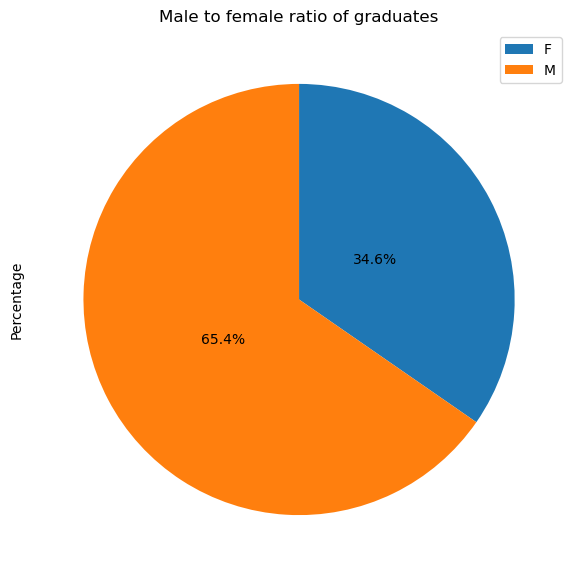

In [772]:
df_grp.plot(kind='pie', autopct='%1.1f%%',
                    title='Male to female ratio of graduates',
                    figsize=(7,7),
                    legend=True,
                    startangle=90, counterclock=False,
                    pctdistance=0.4,
                    label='Percentage',
                    labels=None)


In [773]:
#Visualization using bins to see the frequency of mba candidates based on their grade percentage

In [774]:
df_no_outlier_final['mba_pbin'] = pd.cut(df_no_outlier_final['mba_p'], [0, 10, 20,30,40,50,60,70,80,90,100], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70', '70-80', '80-90', '90-100'])

In [775]:
(df_no_outlier_final[['mba_pbin', 'mba_p']])

,mba_pbin,mba_p
0,50-60,58.80
1,60-70,66.28
2,50-60,57.80
3,50-60,59.43
4,50-60,55.50
...,...,...
210,70-80,74.49
211,50-60,53.62
212,60-70,69.72
213,60-70,60.23


C:\Users\momta\AppData\Local\Temp\ipykernel_75716\2784938047.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfgrp1 =df_no_outlier_final.groupby(['mba_pbin'],as_index=False)['mba_p'].count()


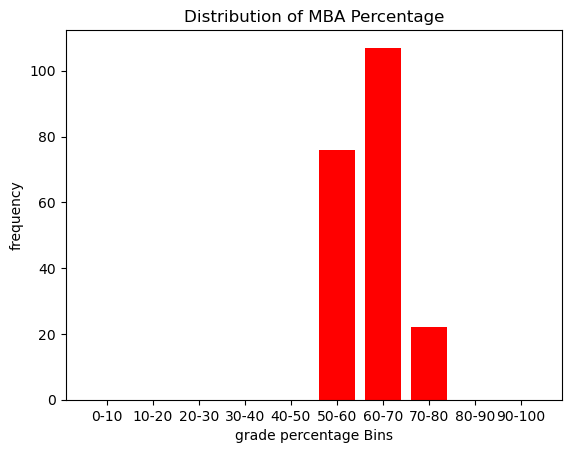

In [776]:
dfgrp1 =df_no_outlier_final.groupby(['mba_pbin'],as_index=False)['mba_p'].count()
plt.bar(dfgrp1['mba_pbin'], dfgrp1['mba_p'], color = 'r')
plt.title('Distribution of MBA Percentage')
plt.xlabel('grade percentage Bins')
plt.ylabel('frequency')
plt.show()

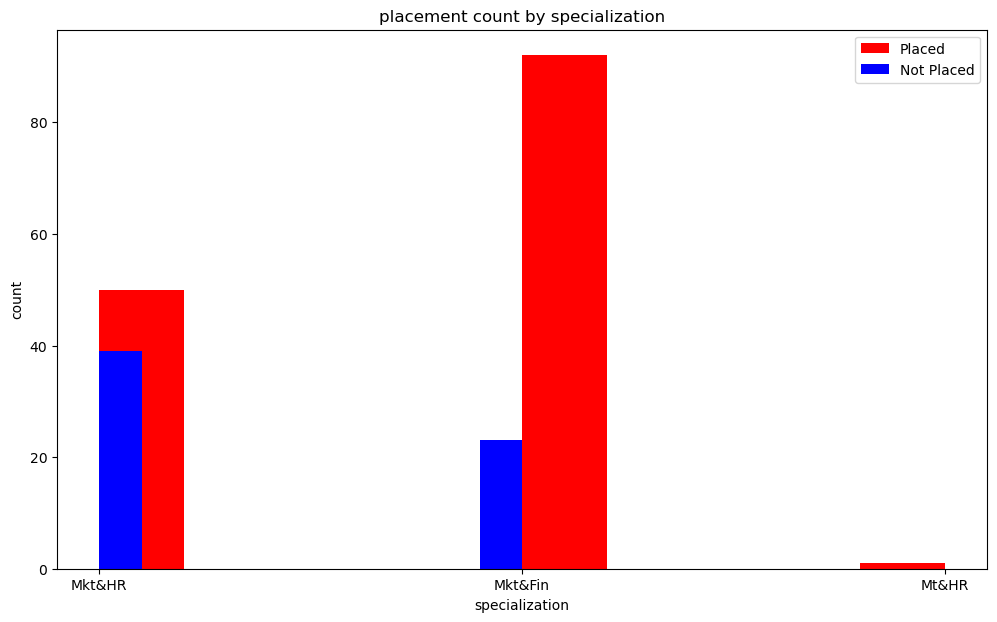

In [777]:
#Now lets see which specialization gets placed the most
plt.figure(figsize=(12, 7))

placed_specializations = df_no_outlier_final['specialisation'][df_no_outlier_final['status'] == 'Placed']
not_placed_specializations = df_no_outlier_final['specialisation'][df_no_outlier_final['status'] == 'Not Placed']

plt.hist(placed_specializations, color='r', label='Placed')
plt.hist(not_placed_specializations, color='b', label='Not Placed')

plt.title('placement count by specialization')
plt.xlabel('specialization')
plt.ylabel('count')
plt.legend()

plt.show()

status  Not Placed  Placed
workex                    
No              52      81
Yes             10      62


<Axes: xlabel='workex'>

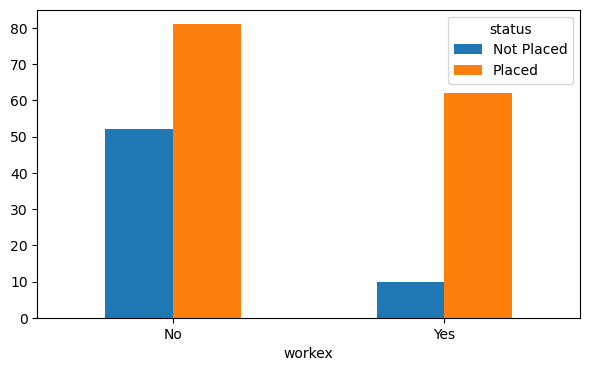

In [778]:
#Visualisation to see the correlation between work experience and getting placed
#reference for code: https://thinkingneuron.com/how-to-visualize-the-relationship-between-two-categorical-variables-in-python/
CrosstabResult=pd.crosstab(index=df_no_outlier_final['workex'],columns=df_no_outlier_final['status'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0)


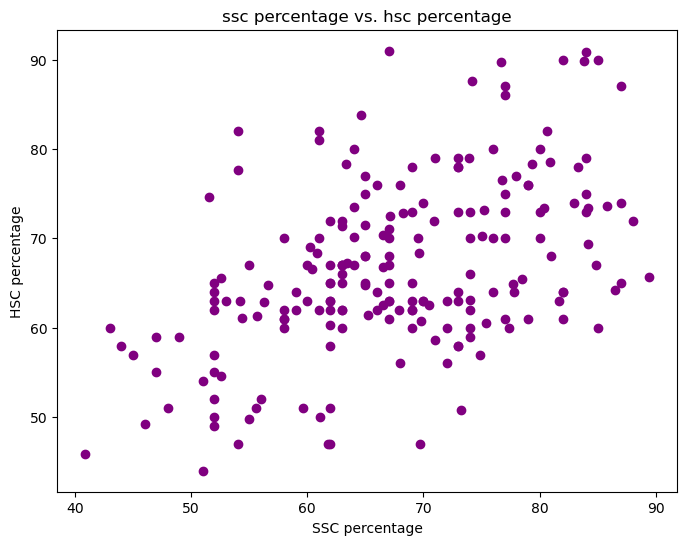

In [779]:
#Corelation between HSC and SSC percentage
#Shows individuals who performs well in ssc also performs well in hsc
plt.figure(figsize=(8, 6))
plt.scatter(df_no_outlier_final['ssc_p'], df_no_outlier_final['hsc_p'], color='purple')
plt.title('ssc percentage vs. hsc percentage')
plt.xlabel('SSC percentage')
plt.ylabel('HSC percentage')
plt.show()

In [780]:
#Visualization to show mba graduates who got placed
df_grp2 = df_no_outlier_final.groupby(['status'])['mba_p'].count()

In [781]:
df_grp2

status
Not Placed     62
Placed        143
Name: mba_p, dtype: int64

<Axes: title={'center': 'MBA graduates who got placed'}, ylabel='Percentage'>

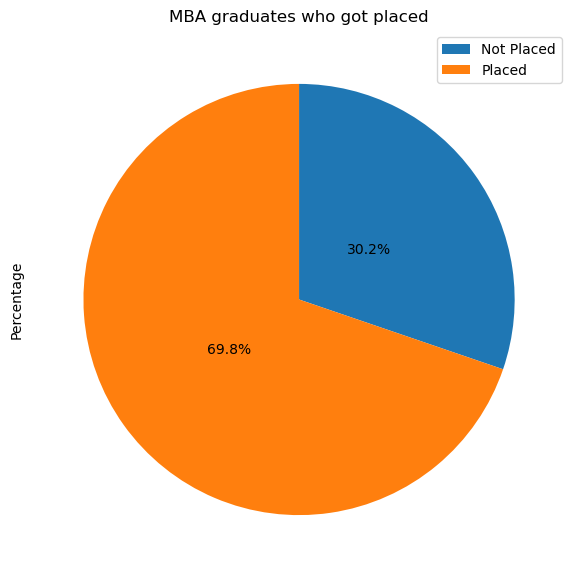

In [782]:
df_grp2.plot(kind='pie', autopct='%1.1f%%',
                    title='MBA graduates who got placed',
                    figsize=(7,7),
                    legend=True,
                    startangle=90, counterclock=False,
                    pctdistance=0.4,
                    label='Percentage',
                    labels=None)


In [783]:
#Visualisation for which gender scores more on employability test
df_grp3 = df_no_outlier_final.groupby(['gender'])['etest_p'].mean()
df_grp3

gender
F    70.458732
M    73.083955
Name: etest_p, dtype: float64

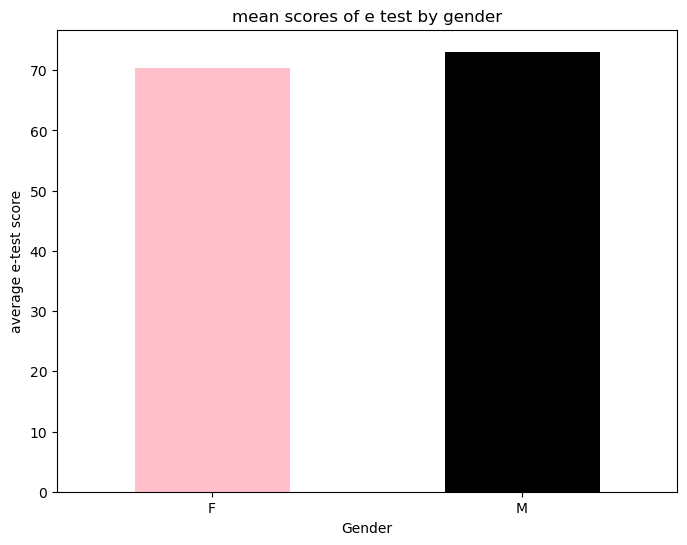

In [784]:
plt.figure(figsize=(8, 6))
df_grp3.plot(kind='bar', color=['pink', 'black'])
plt.title('mean scores of e test by gender')
plt.xlabel('Gender')
plt.ylabel('average e-test score')
plt.xticks(rotation=0)
plt.show()

In [785]:
#Preparation for regression analysis
df_no_outlier_final = pd.get_dummies(df_no_outlier_final, dtype=int)
df_no_outlier_final

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,mba_pbin_0-10,mba_pbin_10-20,mba_pbin_20-30,mba_pbin_30-40,mba_pbin_40-50,mba_pbin_50-60,mba_pbin_60-70,mba_pbin_70-80,mba_pbin_80-90,mba_pbin_90-100
0,1,67.00,91.00,58.00,55.0,58.80,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,79.33,78.33,77.48,86.5,66.28,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,3,65.00,68.00,64.00,75.0,57.80,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,56.00,52.00,52.00,66.0,59.43,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,85.80,73.60,73.30,96.8,55.50,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
211,212,58.00,60.00,72.00,74.0,53.62,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
212,213,67.00,67.00,73.00,59.0,69.72,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
213,214,74.00,66.00,58.00,70.0,60.23,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [786]:
X = df_no_outlier_final
X = X.drop('status_Not Placed', axis = 1)
X = X.drop('status_Placed', axis = 1)

In [787]:
y = df_no_outlier_final['status_Placed']

In [788]:
lr = LogisticRegression()

In [789]:
lr.fit(X,y)

C:\Users\momta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [790]:
lr.score(X,y)

0.8780487804878049

In [791]:
#data seems to be unbalanced
df_no_outlier_final['status_Placed'].value_counts()

status_Placed
1    143
0     62
Name: count, dtype: int64

In [792]:
#lets balance it
pred = lr.predict(X)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y, pred)
lr=LogisticRegression(class_weight='balanced',solver='lbfgs')
lr.fit(X,y)
lr.score(X,y)

C:\Users\momta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8878048780487805

In [793]:
#Spliting the data into a training set and a test set and showing confusion matrix for both

In [794]:
#running the training set

In [795]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [796]:
lr.fit(X_train,y_train)

C:\Users\momta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [797]:
LogisticRegression()

LogisticRegression()

In [798]:
lr.score(X_train,y_train)

0.8951048951048951

In [799]:
pred_train = lr.predict(X_train)

In [800]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_train,pred_train),  
    index=['actual:yes', 'actual:no'], 
    columns=['pred:yes', 'pred:no']
)
print(cmtx)

            pred:yes  pred:no
actual:yes        35        4
actual:no         11       93


In [801]:
#lets do this with the test set now

In [802]:
lr.score(X_test,y_test)

0.8548387096774194

In [803]:
pred_test = lr.predict(X_test)

In [804]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_test,pred_test),  
    index=['actual:yes', 'actual:no'], 
    columns=['pred:yes', 'pred:no']
)
print(cmtx)

            pred:yes  pred:no
actual:yes        16        7
actual:no          2       37
